In [54]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

np.random.seed(42)

### Analisi Esplorativa dei dati

In [55]:
df = pandas.read_csv('data/homicide_df.csv')

display(df)
df.describe()

,geo,year,homicides,poverty,neet,education,unemployment,income,inequity
0,Austria,2016,0.56,14.964810,8.091438,34.540870,3.828207,62.528811,4.09
1,Belgium,2016,1.55,25.110680,13.799563,50.108248,5.316225,60.783882,3.85
2,Bulgaria,2016,1.10,29.330514,16.024476,23.464412,3.648430,32.978295,7.69
3,Cyprus,2016,1.30,1.917201,1.526974,4.767553,0.729554,52.772737,4.88
4,Czechia,2016,0.62,13.086765,11.714766,34.405528,2.743999,43.974128,3.50
...,...,...,...,...,...,...,...,...,...
157,Portugal,2021,0.80,23.068084,9.783339,48.916697,4.531231,48.953165,5.66
158,Romania,2021,0.99,66.245734,38.979374,44.739872,6.144532,37.809305,7.14
159,Sweden,2021,1.09,17.852387,6.227577,51.169924,6.746542,63.711278,4.04
160,Slovenia,2021,0.43,2.783850,1.539553,10.102000,0.653783,54.222503,3.24


,year,homicides,poverty,neet,education,unemployment,income,inequity
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2018.500000,1.217469,36.320591,23.064795,64.467123,8.095696,52.712330,4.844383
std,1.713121,1.025127,48.065890,34.141798,84.069332,12.501566,10.340572,1.202327
min,2016.000000,0.320000,0.892976,0.347262,1.544923,0.114168,30.526920,3.030000
25%,2017.000000,0.690000,7.893735,3.570964,14.613305,1.431114,44.140811,4.042500
50%,2018.500000,0.885000,14.914794,8.182723,29.957130,2.847736,53.328431,4.435000
75%,2020.000000,1.292500,30.007613,18.667848,51.700525,6.701091,62.307751,5.727500
max,2021.000000,5.640000,174.625565,148.023944,339.452221,59.443327,74.903505,8.230000


<Axes: >

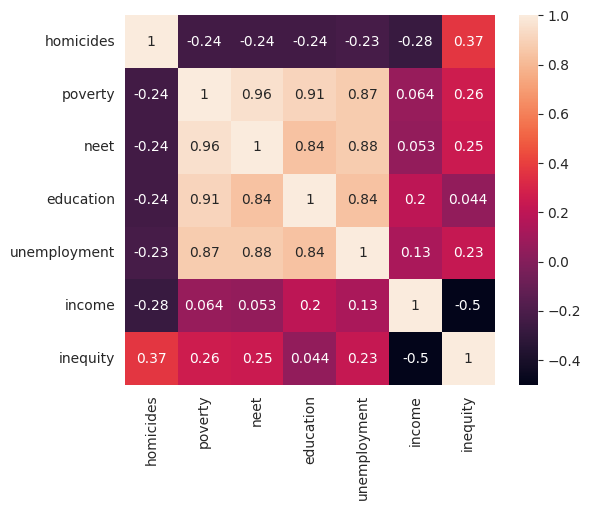

In [56]:
# Correlation Matrix
corrmat = df.drop(columns=["geo", "year"]).corr()

sns.heatmap(corrmat, square=True, annot=True)

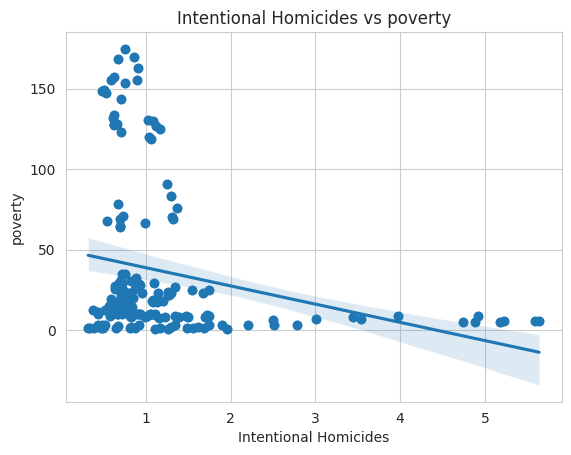

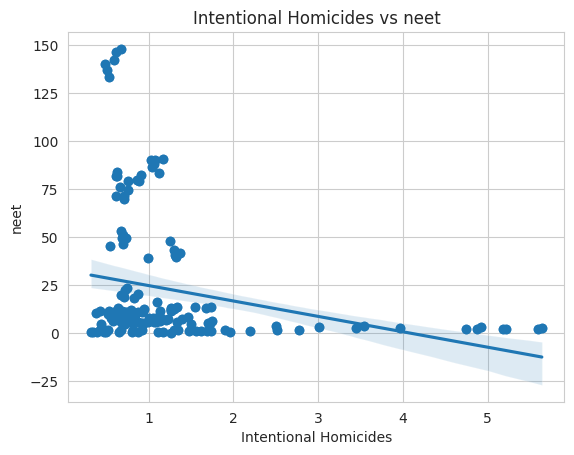

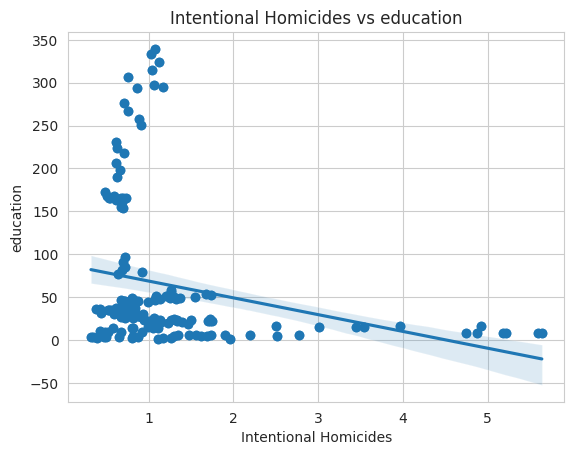

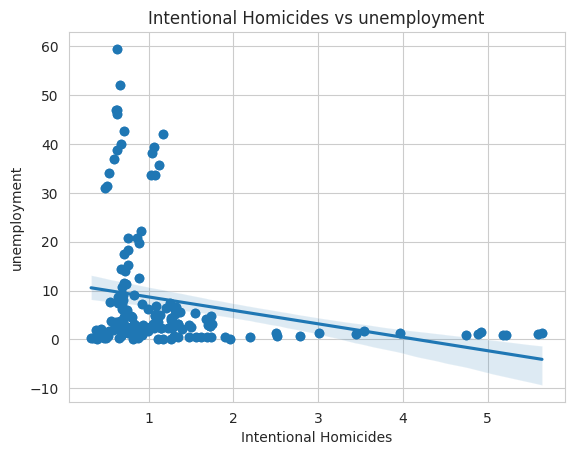

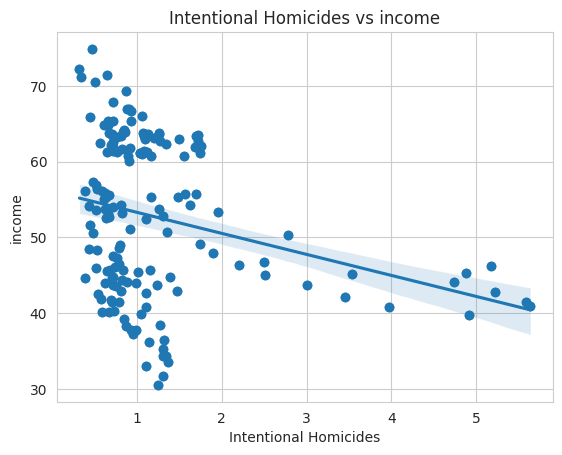

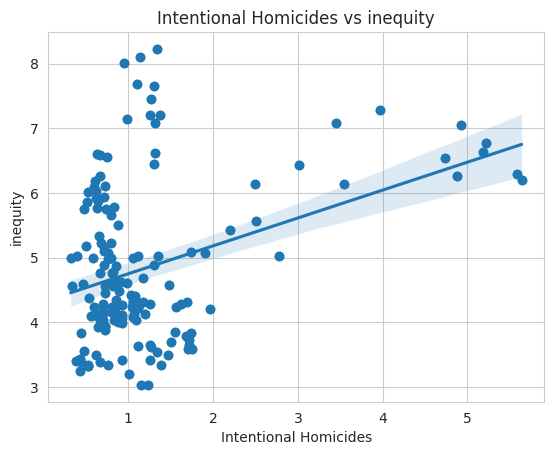

In [57]:
# Scatter Plot
features = ["poverty", "neet", "education", "unemployment", "income", "inequity"]

for feature in features:
    sns.regplot(x="homicides", y=feature, data=df)
    plt.scatter(df["homicides"], df[feature])
    plt.xlabel("Intentional Homicides")
    plt.ylabel(feature)
    plt.title("Intentional Homicides vs " + feature)
    plt.show()


# Modeling

In [58]:
X = df.drop(columns=["geo", "year", "homicides"])
y = df["homicides"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.3174554941698946

In [59]:
# ANOVA Model
model = ols("homicides ~ poverty + neet + education + unemployment + income + inequity", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq     df          F        PR(>F)
poverty         6.864041    1.0   9.041213  3.080470e-03
neet            0.718156    1.0   0.945945  3.322691e-01
education       7.729179    1.0  10.180760  1.718023e-03
unemployment    1.466730    1.0   1.931955  1.665377e-01
income          0.148863    1.0   0.196081  6.585205e-01
inequity       29.669294    1.0  39.079955  3.766438e-09
Residual      117.675174  155.0        NaN           NaN


In [60]:
X2 = sm.add_constant(df.drop(columns=["geo", "year", "homicides"]))
model = sm.OLS(y, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              homicides   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     11.31
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.84e-10
Time:                        14:23:42   Log-Likelihood:                -203.97
No. Observations:                 162   AIC:                             421.9
Df Residuals:                     155   BIC:                             443.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7266      0.682     -1.066   

In [61]:
hypothesis_0 = "poverty = 0, neet = 0, education = 0, unemployment = 0, income = 0, inequity = 0"
print(results.t_test(hypothesis_0))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0224      0.007     -3.007      0.003      -0.037      -0.008
c1             0.0077      0.008      0.973      0.332      -0.008       0.023
c2             0.0081      0.003      3.191      0.002       0.003       0.013
c3            -0.0179      0.013     -1.390      0.167      -0.043       0.008
c4            -0.0036      0.008     -0.443      0.659      -0.020       0.012
c5             0.4932      0.079      6.251      0.000       0.337       0.649


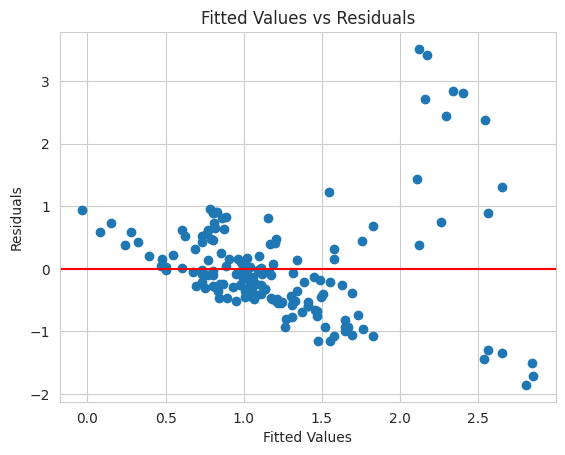

In [62]:
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs Residuals")
plt.axhline(y=0, color="red")
plt.show()

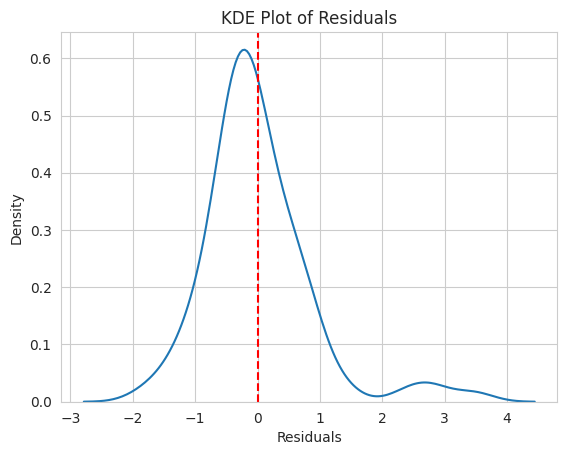

In [63]:
# KDE Plot of residuals
sns.kdeplot(results.resid)
plt.axvline(results.resid.mean(), linestyle='dashed', color="red")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("KDE Plot of Residuals")
plt.show()

In [64]:
#sm.graphics.plot_partregress_grid(results)

### Top 5 regions with the highest intentional homicide in total

In [65]:
data = df.drop(columns=["poverty", "neet", "education", "unemployment", "income", "inequity"])
display(data.groupby("geo").sum().sort_values(by="homicides", ascending=False).head(5))

,year,homicides
geo,,
Latvia,12111,31.25
Lithuania,12111,21.39
Estonia,12111,12.48
Finland,12111,9.73
Belgium,12111,8.76


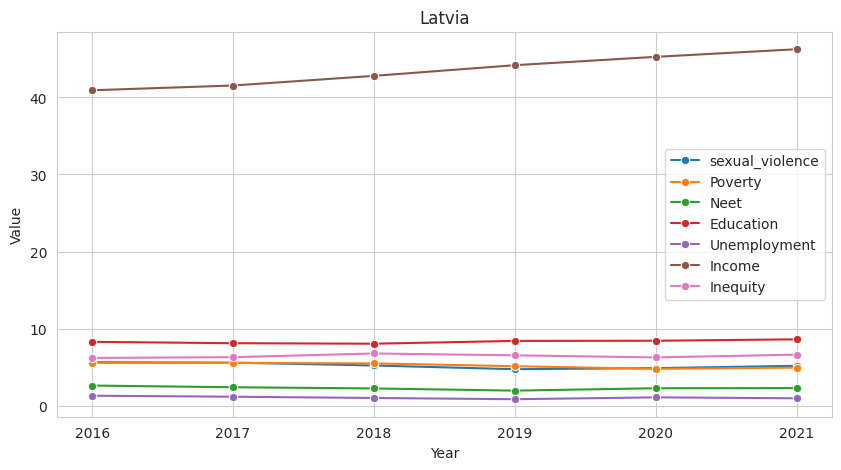

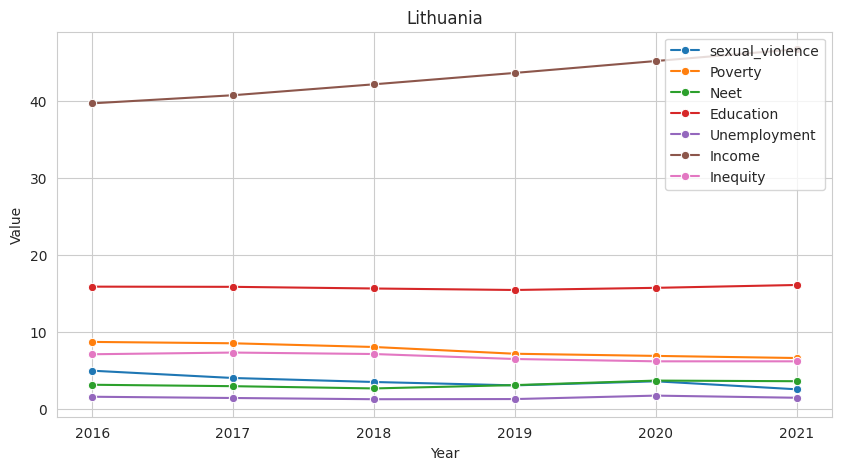

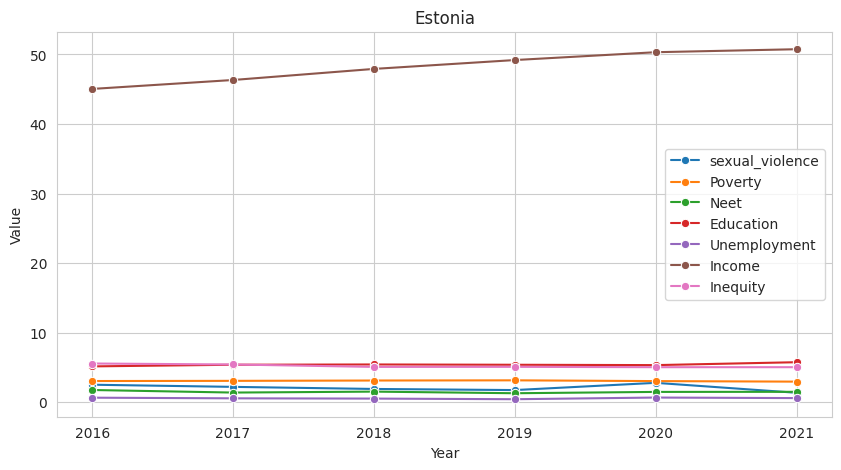

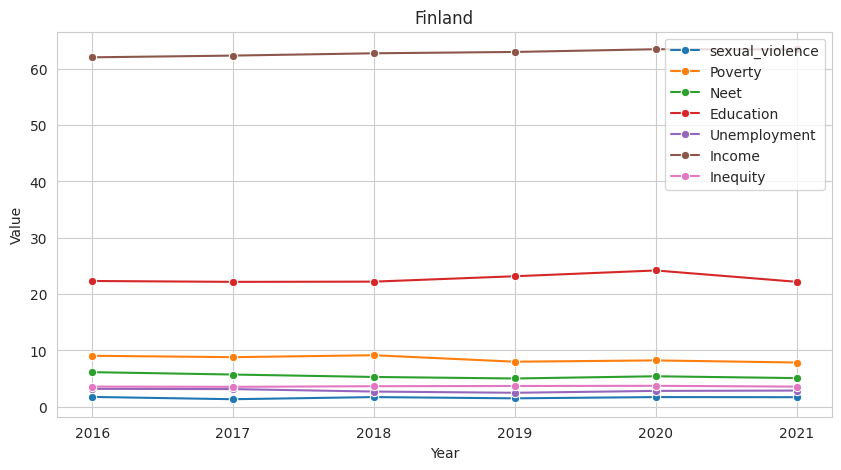

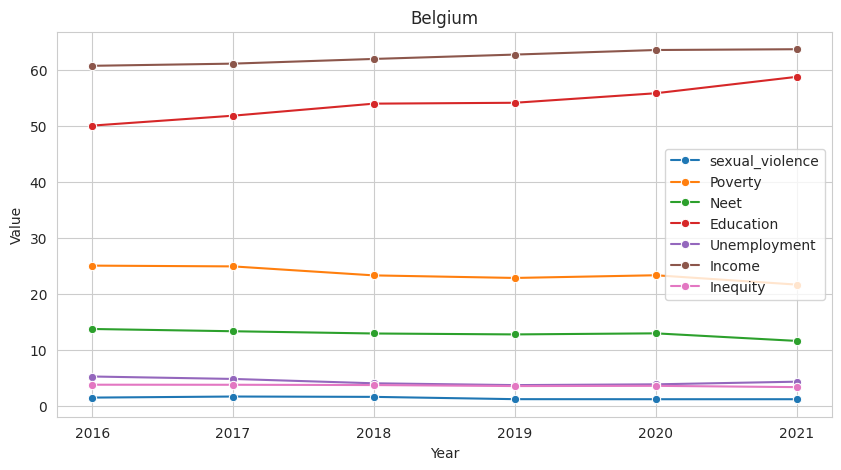

In [66]:
# Data Visualization

latvia = df[df["geo"] == "Latvia"]
lithuania = df[df["geo"] == "Lithuania"]
estonia = df[df["geo"] == "Estonia"]
finland = df[df["geo"] == "Finland"]
belgium = df[df["geo"] == "Belgium"]

countries = [latvia, lithuania, estonia, finland, belgium]

for country in countries:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="year", y="homicides", data=country, label="sexual_violence", marker="o")
    sns.lineplot(x="year", y="poverty", data=country, label="Poverty", marker="o")
    sns.lineplot(x="year", y="neet", data=country, label="Neet", marker="o")
    sns.lineplot(x="year", y="education", data=country, label="Education", marker="o")
    sns.lineplot(x="year", y="unemployment", data=country, label="Unemployment", marker="o")
    sns.lineplot(x="year", y="income", data=country, label="Income", marker="o")
    sns.lineplot(x="year", y="inequity", data=country, label="Inequity", marker="o")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title(country["geo"].iloc[0])
    plt.show()